### Assignment: CTA200H Problem Set (Problem 5)
#### Authors: Ayush Pandhi & Mathew Bub
#### Due Date: May 13, 2019

We begin by defining a function to iterate each point in the complex plane.

In [1]:
def iterate_mandelbrot(z, c):
    return z**2 + c

Now, we create a grid of points in the complex plane at which to iterate this function.

In [2]:
import numpy as np

minx = -2
maxx = 2
miny = -2
maxy = 2
npoints = 1000

x = np.linspace(-2, 2, npoints)
y = np.linspace(-2, 2, npoints)
X, Y = np.meshgrid(x, y)
C = X + Y * 1j

Using this, we can iterate each point in the complex plane as many times as we like.

In [3]:
Z = 0
for i in range(10):
    Z = iterate_mandelbrot(Z, C)
print(Z)

[[-2.17996262e+208+5.76746032e+208j -3.35266980e+208+2.16781833e+208j
  -2.58128701e+208-1.61267588e+207j ... -1.36407169e+257+6.68396751e+256j
  -2.51147583e+257+1.17812876e+256j -3.89245988e+257-1.46980988e+257j]
 [ 2.41154958e+207+3.25791100e+208j -1.12613146e+208+1.78836981e+208j
  -1.27420886e+208+4.97207067e+207j ... -1.00785257e+257-4.92025117e+255j
  -1.49972736e+257-7.38076793e+256j -1.79549363e+257-2.10714537e+257j]
 [ 8.44756673e+207+1.50992817e+208j -1.40735830e+207+1.10935825e+208j
  -4.99901601e+207+5.22399213e+207j ... -5.70137533e+256-3.52695147e+256j
  -6.35278487e+256-9.11999321e+256j -3.67567514e+256-1.80525323e+257j]
 ...
 [ 8.44756673e+207-1.50992817e+208j -1.40735830e+207-1.10935825e+208j
  -4.99901601e+207-5.22399213e+207j ... -5.70137533e+256+3.52695147e+256j
  -6.35278487e+256+9.11999321e+256j -3.67567514e+256+1.80525323e+257j]
 [ 2.41154958e+207-3.25791100e+208j -1.12613146e+208-1.78836981e+208j
  -1.27420886e+208-4.97207067e+207j ... -1.00785257e+257+4.920251

After 100 iterations, we can check which points have diverged (i.e., which points have become `np.nan`).

In [4]:
Z = 0
for i in range(100):
    Z = iterate_mandelbrot(Z, C)
diverged = np.isnan(Z)
print(diverged)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in square
  


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


We can then directly plot this boolean array, colouring values of `False` (i.e., bounded points) in black.

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

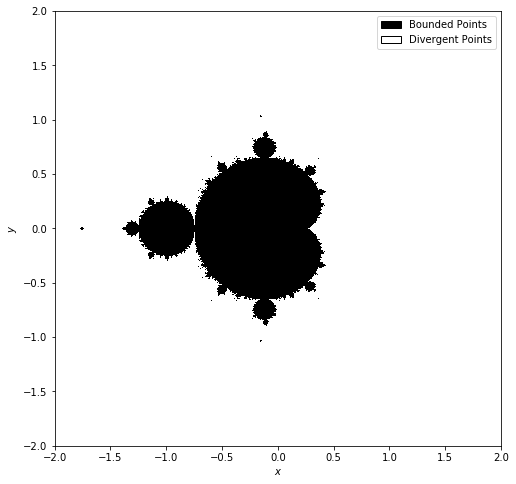

In [6]:
fig, ax = plt.subplots(figsize=(8,8))

# Manual legend
legend_elements = [Patch(facecolor='black', edgecolor='black', label='Bounded Points'), 
                   Patch(facecolor='white', edgecolor='black', label='Divergent Points')]
ax.legend(handles=legend_elements)

# Plot the boolean array, interpreting 'True' as '1' and 'False' as '0'
ax.imshow(diverged, extent=[minx, maxx, miny, maxy], aspect='auto', origin='lower', 
          cmap='binary_r', vmin=0, vmax=1)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()

The process is similar to colour this plot by the iteration of divergence; we simply count the number of iterations during which a point was `np.nan`.

In [7]:
Z = 0
niters = 100
divergence_iters = np.zeros_like(C).astype(int)
for i in range(niters):
    Z = iterate_mandelbrot(Z, C)
    divergence_iters += np.isnan(Z) # Count the number of iterations for which each point is np.nan
divergence_count = niters - divergence_iters # Flip to get the iteration of divergence

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in square
  


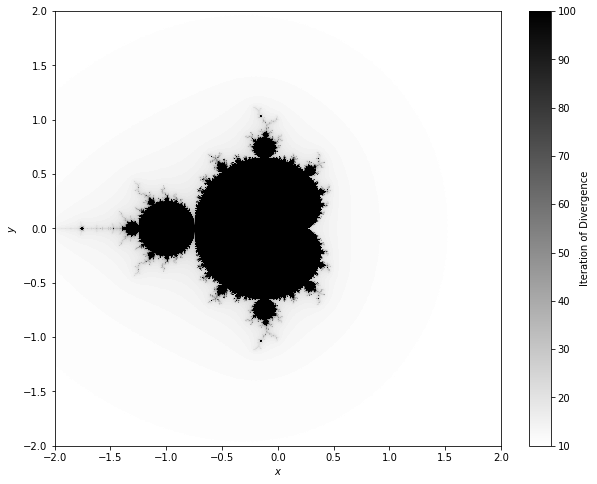

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(divergence_count, extent=[minx, maxx, miny, maxy], aspect='auto', 
               origin='lower', cmap='binary')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.colorbar(im, label="Iteration of Divergence")
plt.show()

We can zoom in on a portion of the image simply by taking a smaller x and y range.

In [9]:
minx = -0.2
maxx = 0
miny = -1.1
maxy = -0.9

x = np.linspace(minx, maxx, npoints)
y = np.linspace(miny, maxy, npoints)
X, Y = np.meshgrid(x, y)
C = X + Y * 1j

In [10]:
Z = 0
niters = 250
divergence_iters = np.zeros_like(C).astype(int)
for i in range(niters):
    Z = iterate_mandelbrot(Z, C)
    divergence_iters += np.isnan(Z)
divergence_count = niters - divergence_iters

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in square
  


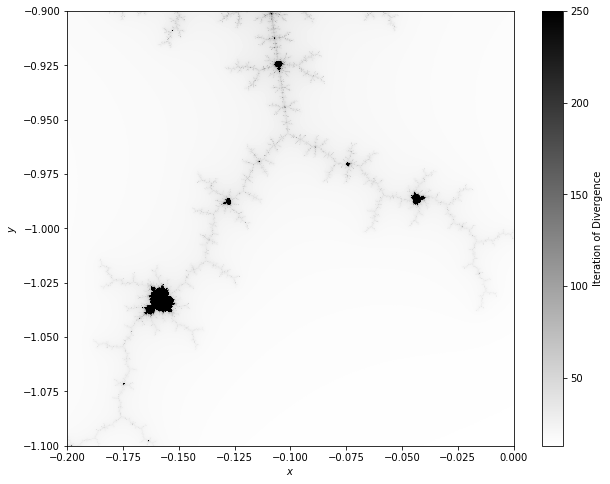

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(divergence_count, extent=[minx, maxx, miny, maxy], aspect='auto', 
               origin='lower', cmap='binary')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.colorbar(im, label="Iteration of Divergence")